In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-05-08 02:18:44--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 108.177.11.128, 74.125.134.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

inception_v3_weight 100%[===================>]  83.84M   284MB/s    in 0.3s    

2022-05-08 02:18:45 (284 MB/s) - ‘inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from google.colab import files

uploaded = files.upload()
!pip install -q kaggle

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 94% 153M/163M [00:01<00:00, 126MB/s]
100% 163M/163M [00:01<00:00, 118MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

local_incorrect_zip = '/content/drive/MyDrive/Dataset/Mask dataset/IMFD.zip'
zip_ref = ZipFile(local_incorrect_zip, 'r')
zip_ref.extractall('/content/incorrect-mask')
zip_ref.close()

In [ ]:
local_correct_zip = '/content/drive/MyDrive/Dataset/Mask dataset/CMFD.zip'
zip_ref = ZipFile(local_correct_zip, 'r')
zip_ref.extractall('/content/correct-mask')
zip_ref.close()

In [ ]:
local_no_zip = 'face-mask-dataset.zip'
zip_ref = ZipFile(local_no_zip, 'r')
zip_ref.extractall('/content/no-mask')
zip_ref.close()

In [ ]:
import os

def insert_image_to_array(directory, threshold=10000):
  temp = []
  for dir in os.listdir(directory):
    sub = os.path.join(directory, dir)
    for f in os.listdir(sub):
      img = os.path.join(sub, f)
      if len(temp) < threshold:
        temp.append(img)
  return temp

correct_mask_dir = '/content/correct-mask'
correct_mask = insert_image_to_array(correct_mask_dir)
print('total correct mask image: ', len(correct_mask))

total correct mask image:  10000


In [ ]:
incorrect_mask_dir = '/content/incorrect-mask'
incorrect_mask = insert_image_to_array(incorrect_mask_dir, threshold=100000)
print('total incorrect mask image: ', len(incorrect_mask))

total incorrect mask image:  33553


In [ ]:
no_mask = []
no_mask_dir = '/content/no-mask/data/without_mask'
for f in os.listdir(no_mask_dir):
  no_mask.append(os.path.join(no_mask_dir, f))
print('total no mask image: ', len(no_mask))

total no mask image:  3828


In [ ]:
import math

def split_dataset(array, test_size):
  split = math.ceil(len(array) * test_size)
  split = len(array) - split
  return array[:split], array[split:]
  
correct_train, correct_valid = split_dataset(correct_mask, 0.03)
print('total correct training: ', len(correct_train))
print('total correct validation: ', len(correct_valid))

total correct training:  9700
total correct validation:  300


In [ ]:
incorrect_train, incorrect_valid = split_dataset(incorrect_mask, 0.01)
print('total incorrect training: ', len(incorrect_train))
print('total incorrect validation: ', len(incorrect_valid))

total incorrect training:  33217
total incorrect validation:  336


In [ ]:
no_train, no_valid = split_dataset(no_mask, 0.1)
print('total no mask training: ', len(no_train))
print('total no mask validation: ', len(no_valid))

total no mask training:  3445
total no mask validation:  383


In [ ]:
import os
import shutil

os.makedirs('/content/mask-dataset')
os.makedirs('/content/mask-dataset/train')
os.makedirs('/content/mask-dataset/train/correct-mask')
os.makedirs('/content/mask-dataset/train/incorrect-mask')
os.makedirs('/content/mask-dataset/train/no-mask')
os.makedirs('/content/mask-dataset/valid')
os.makedirs('/content/mask-dataset/valid/correct-mask')
os.makedirs('/content/mask-dataset/valid/incorrect-mask')
os.makedirs('/content/mask-dataset/valid/no-mask')

In [ ]:
def move_img(array, dest):
  for img in array:
    shutil.move(img, dest)

train_mask = '/content/mask-dataset/train/correct-mask'
valid_mask = '/content/mask-dataset/valid/correct-mask'
move_img(correct_train, train_mask)
move_img(correct_valid, valid_mask)
print('total training correct: ', len(os.listdir(train_mask)))
print('total validation correct: ', len(os.listdir(valid_mask)))

total training correct:  9700
total validation correct:  300


In [ ]:
train_incorrect = '/content/mask-dataset/train/incorrect-mask'
valid_incorrect = '/content/mask-dataset/valid/incorrect-mask'
move_img(incorrect_train, train_incorrect)
move_img(incorrect_valid, valid_incorrect)
print('total training incorrect: ', len(os.listdir(train_incorrect)))
print('total validation correct: ', len(os.listdir(valid_incorrect)))

total training incorrect:  33217
total validation correct:  336


In [ ]:
train_no = '/content/mask-dataset/train/no-mask'
valid_no = '/content/mask-dataset/valid/no-mask'
move_img(no_train, train_no)
move_img(no_valid, valid_no)
print('total training no mask: ', len(os.listdir(train_no)))
print('total validation no mask: ', len(os.listdir(valid_no)))

total training no mask:  3445
total validation no mask:  383


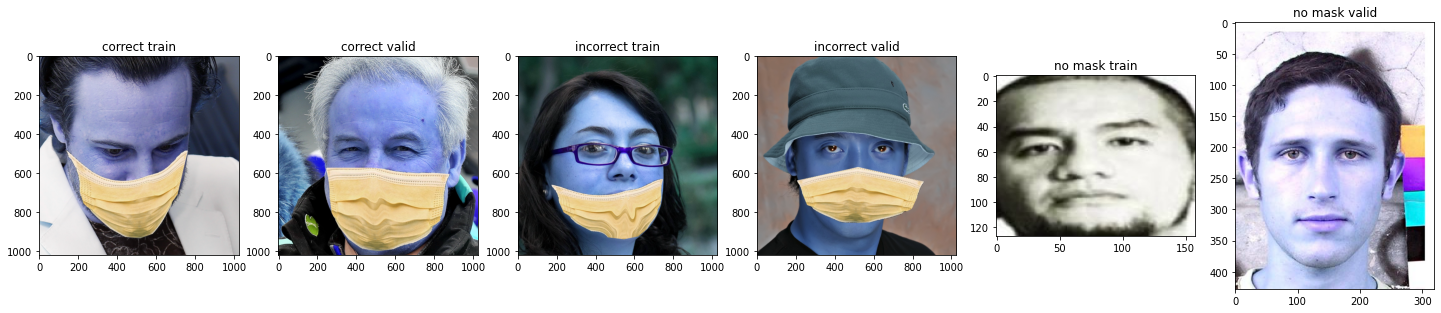

In [ ]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(1, 6, figsize=(25,15))
sample_img = [
  os.path.join(train_mask, os.listdir(train_mask)[0]),
  os.path.join(valid_mask, os.listdir(valid_mask)[0]),
  os.path.join(train_incorrect, os.listdir(train_incorrect)[0]),
  os.path.join(valid_incorrect, os.listdir(valid_incorrect)[0]),
  os.path.join(train_no, os.listdir(train_no)[0]),
  os.path.join(valid_no, os.listdir(valid_no)[0])
]
sample_title = ['correct train', 'correct valid', 'incorrect train', 'incorrect valid', 'no mask train', 'no mask valid']

for i in range(len(sample_img)):
  img = cv2.imread(sample_img[i])
  ax[i].title.set_text(sample_title[i])
  ax[i].imshow(img)

In [ ]:
from tensorflow import keras
from keras.applications.inception_v3 import InceptionV3

img_size = 128
local_weight = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(
    include_top=False,
    weights=None,
    input_shape=(img_size,img_size,3)
)

# load weights to pre trained model
pre_trained_model.load_weights(local_weight)

In [ ]:
# disable trainable layer on pre trained model
for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

In [ ]:
from keras import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop

x = GlobalAveragePooling2D()(last_output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(3, activation='softmax')(x)

model = Model(pre_trained_model.input, x)
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=1e-4), metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
train_dir = '/content/mask-dataset/train'
valid_dir = '/content/mask-dataset/valid'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

def create_generator(train_dir, valid_dir, img_size):
  train_datagen = ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
  )

  train_generator = train_datagen.flow_from_directory(
      train_dir,
      target_size=(img_size,img_size),
      batch_size=426,
      class_mode='categorical'
  )

  valid_generator = train_datagen.flow_from_directory(
      valid_dir,
      target_size=(img_size,img_size),
      batch_size=47,
      class_mode='categorical'
  )
  
  return train_generator, valid_generator

In [ ]:
train_generator, valid_generator = create_generator(train_dir, valid_dir, img_size)

Found 46362 images belonging to 3 classes.
Found 1019 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.callbacks import Callback

def create_callbacks(Callback):
  class Callback(Callback):
    def on_epoch_end(self, epoch, logs={}):
      if logs.get('accuracy') > 0.98 and logs.get('val_accuracy') > 0.98:
        print('Stopping training, accuracy has reached 98%')
        self.model.stop_training = True

  return Callback()

In [ ]:
callbacks = create_callbacks(Callback)

history = model.fit(
    train_generator,
    epochs=100,
    validation_data=valid_generator,
    callbacks=[callbacks]
)

Epoch 1/100
109/109 [==============================] - 1063s 10s/step - loss: 0.4158 - accuracy: 0.8301 - val_loss: 0.2813 - val_accuracy: 0.9058
Epoch 2/100
109/109 [==============================] - 1043s 10s/step - loss: 0.1716 - accuracy: 0.9421 - val_loss: 0.1532 - val_accuracy: 0.9539
Epoch 3/100
109/109 [==============================] - 1052s 10s/step - loss: 0.1191 - accuracy: 0.9607 - val_loss: 0.1191 - val_accuracy: 0.9549
Epoch 4/100
109/109 [==============================] - 1016s 9s/step - loss: 0.0982 - accuracy: 0.9673 - val_loss: 0.1338 - val_accuracy: 0.9421
Epoch 5/100
109/109 [==============================] - 1007s 9s/step - loss: 0.0850 - accuracy: 0.9703 - val_loss: 0.1098 - val_accuracy: 0.9568
Epoch 6/100
109/109 [==============================] - 1018s 9s/step - loss: 0.0769 - accuracy: 0.9728 - val_loss: 0.0853 - val_accuracy: 0.9696
Epoch 7/100
109/109 [==============================] - 1054s 10s/step - loss: 0.0716 - accuracy: 0.9752 - val_loss: 0.0856 - va

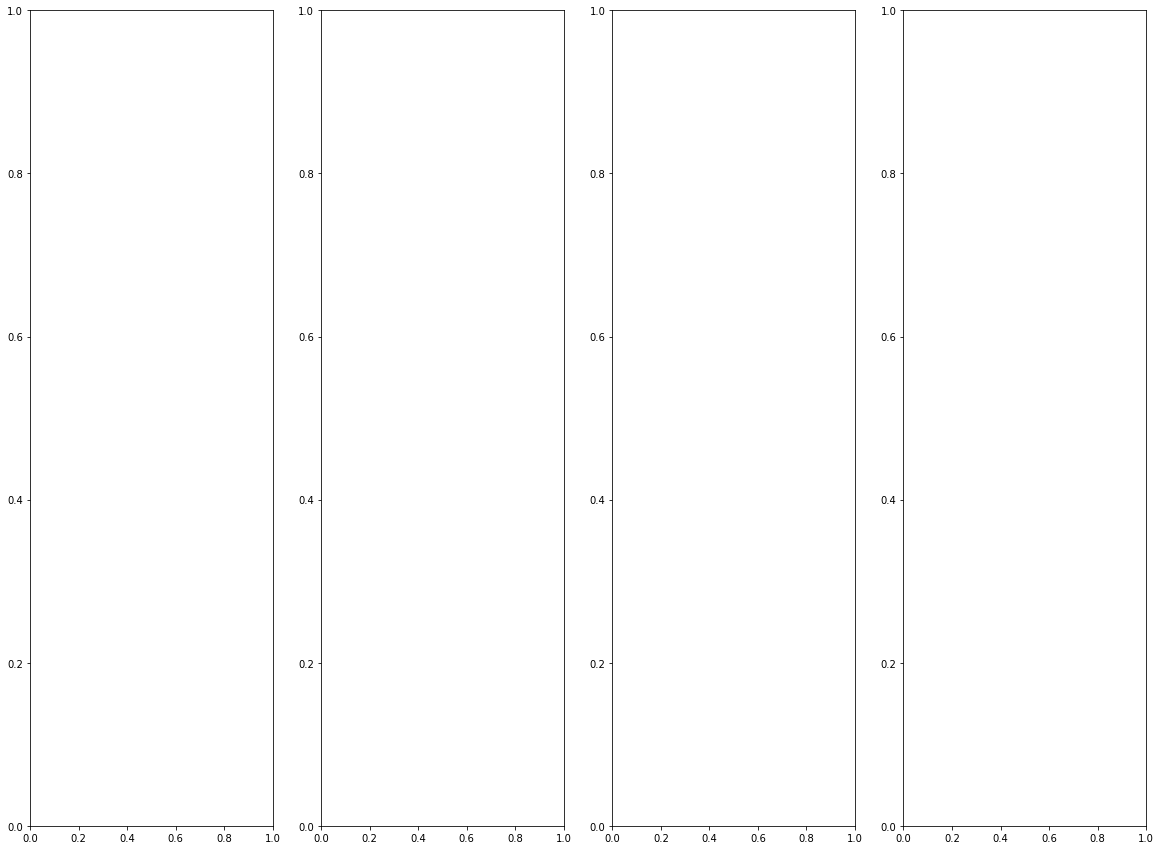

In [ ]:
def plot_history(x, y, loc, title):
  ax[loc].title.set_text(title)
  ax[loc].plot(x, y)

fig, ax = plt.subplots(1,4, figsize=(20,15))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = len(history.history)

In [ ]:
plot_history(epoch, acc, loc=0, title='accuracy')
plot_history(epoch, val_acc, loc=1, title='val_accuracy')
plot_history(epoch, loss, loc=2, title='loss')
plot_history(epoch, val_loss, loc=3, title='val_loss')

ValueError: ignored

In [ ]:
model.save('model_uasaiV2.h5')